In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Load dataset

This is a classification dataset. For more details on the features and labels, please check this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

Run the following cell to load features (X) and labels (y).

In [2]:
from sklearn.datasets import load_breast_cancer

# read data
data = load_breast_cancer()
X = data.data
y = data.target

## Part 1: Train test split:

Use 80% of the data to train the model and 20% of the data to test.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

**Question: Why do you need to do train_test split before your run dimension reduction algorithms?**

Answer: I run the train_test split prior to avoid data pollution. The test data will not be polluted by the train data, which is used to train the model. Otherwise, the test would not be an accurate reflection of the performance of the model. If the data is polluted, the test result might be artificially inflated, giving an inaccurate esimate.

## Part 2: Dimension Reduction and visualization

Please implement PCA, kernel PCA and LLE for **training data samples**, and then visualize reduced training data samples in 2D-plane.

Requirements:

1. You should pick a good kernel/hyperparameter for kernel PCA, and number of neighborhoods for LLE. You do not need to show the process.

2. You should include all visualizations in one Figure using subplots. You should add x-label, y-label, legend, and title to make your plots clear. Moreover, you should include the used kernel/hyperparameters for kernel PCA visualization. Please see my sample plots below. Your plots can be different from my plots if parameters are different. But the layout (plot labels, lengends, and etc) should be similar.

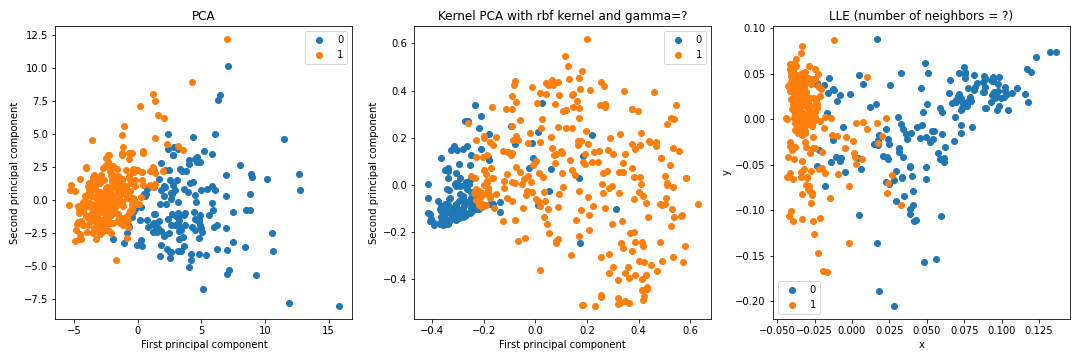

3. In-line comments are required to explain your codes.

Grading is based on the following:
1. You should implement each algorithm correctly. 
2. Comments are included. 
3. Visualization is clear and meets the requirements.





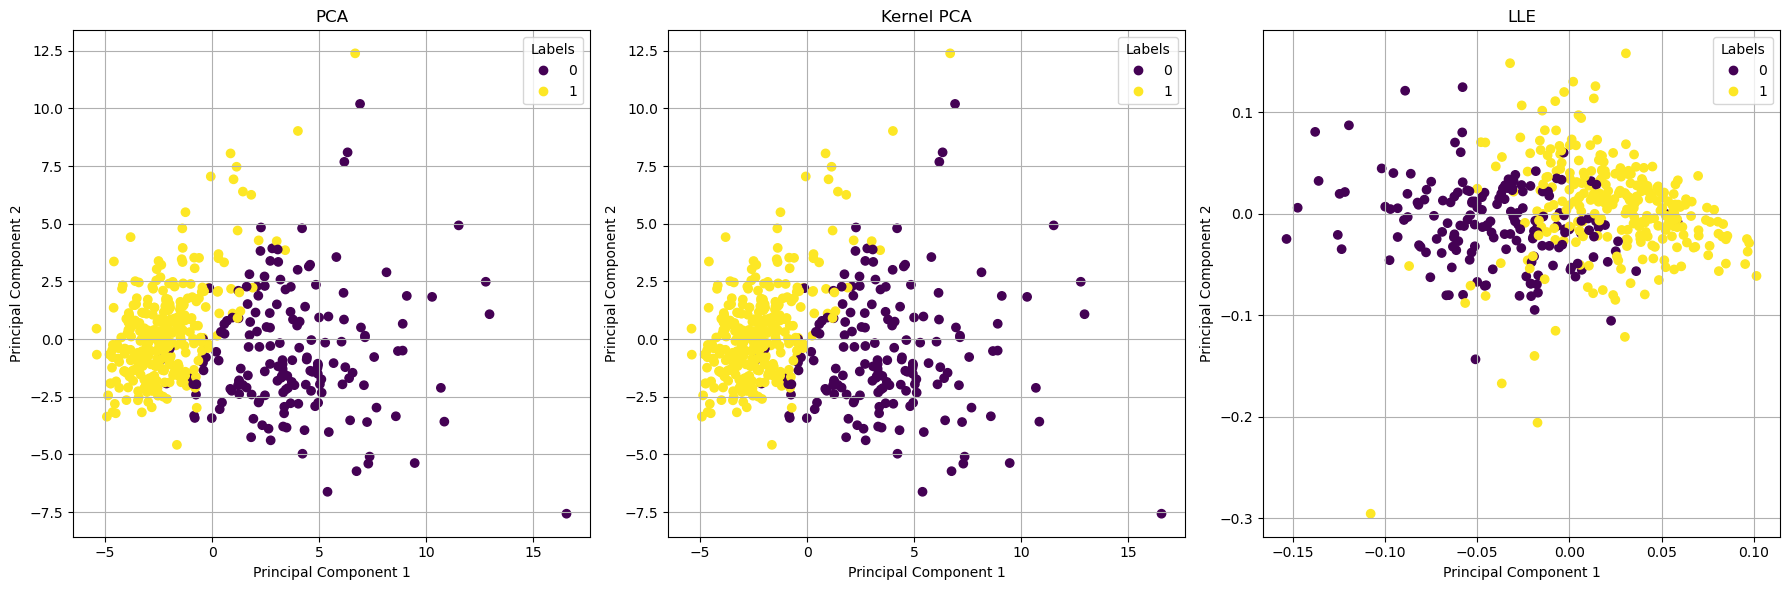

In [4]:
#standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# implementing PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# implementing Kernel PCA
kernel_pca = KernelPCA(n_components=2, gamma=10)
X_kpca = kernel_pca.fit_transform(X_train)

# implementing LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=20)
X_lle = lle.fit_transform(X_train)

# Plotting 3 subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# PCA Plot
scatter_pca = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')
ax[0].set_title('PCA')
ax[0].grid(True)

# Kernel PCA Plot
scatter_kpca = ax[1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y_train, cmap='viridis')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
ax[1].set_title('Kernel PCA')
ax[1].grid(True)

# LLE Plot
scatter_lle = ax[2].scatter(X_lle[:, 0], X_lle[:, 1], c=y_train, cmap='viridis')
ax[2].set_xlabel('Principal Component 1')
ax[2].set_ylabel('Principal Component 2')
ax[2].set_title('LLE')
ax[2].grid(True)

# Legends
for i, scatter in enumerate([scatter_pca, scatter_kpca, scatter_lle]):
    ax[i].legend(*scatter.legend_elements(), title="Labels")

plt.tight_layout()
plt.show()

## Part 3: Train classification models

In this part, you will train several models using **reduced training samples**.

* First of all, based on your visualization result in part 2, please determine which dimension reduction technique you want to use for part 3 and state the reason.

* Second, please do dimension reduction on training samples using the technique you select. (This step is the same as part 2, so you do not need to repeat the code, you can use what you obtain from part 2)

* Third, you should train k-nearest-neighbors, logistic regression, decision tree, random forest, and voting classifier models (use all models mention before) on reduced training samples and then report test accuracy.

* Last, show the decision region for each model. Please look at this reference [code](https://nbviewer.org/github/PhilChodrow/PIC16A/blob/master/live_lectures/22-live-lecture.ipynb) and visualize the decision regions. You should write a function to draw decision region for any classification model and any data samples. Function docstring is required.

Please follow the following instructions and finish part 3. Inline comments are required for your code.

#### 3(a) Determine the dimension reduction technique you will use and state the reason

I will use LLE method based on the visualization in part 2. Based on the graph, there is less overlap between 0 and 1; which makes the two classifications more distinct. Using this method would give better results as the two classes seem better separated and there is less overlap in the data. It would be easier for the model to find a decision region.

#### 3(b) Do dimension reduction

You can repeat part 2 or use results from part 2

In [5]:
#### Your code here
#using LLE from part 2 on train and test
X_train_lle = X_lle
X_test_lle = lle.transform(X_test)

#### 3(c) Write a function to draw decision region

Your function looks similar as the function in the sample codes, but you should modify the code because it only works for penguin data.

Docsting and inline comments are required.

In [6]:
#### Your code here
def decision_regions(X, y, classifier, resolution=0.02, title='Decision Region'):
    """
    Plot decision region of classifier

    Args:
    - X (np array): feature
    - y (np.ndarray): target
    - classifier (model object): fit classifier with predict model
    - resolution (float): Meshgrid resolution
    - title (str): title
    """
    #Define colormap
    cmap = ListedColormap(['red', 'blue'])

    #Create meshgrid for plot, create 0.01 space margin
    x1_min, x1_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    x2_min, x2_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    #Predict on meshgrid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    #Plot decision boundary and use min and max values of dataset as plot size
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #Plot the data points and show the plot and create legend
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor='k')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(title)
    plt.legend(*scatter.legend_elements(), title="Labels", loc='upper left')
    plt.grid(True)
    plt.show()

#### 3(d) Train k-nearest-neighbors model

You should try different k's and select the best one. You can either use cross-validation or train models using different k manually.

Print the test accuracy for all models, and draw the decision region for the model with the best k.

k value: 1, Cross-validation mean accuracy: 0.8330
k value: 2, Cross-validation mean accuracy: 0.8066
k value: 3, Cross-validation mean accuracy: 0.8330
k value: 4, Cross-validation mean accuracy: 0.8462
k value: 5, Cross-validation mean accuracy: 0.8418
k value: 6, Cross-validation mean accuracy: 0.8418
k value: 7, Cross-validation mean accuracy: 0.8440
k value: 8, Cross-validation mean accuracy: 0.8505
k value: 9, Cross-validation mean accuracy: 0.8440
k value: 10, Cross-validation mean accuracy: 0.8462
k value: 11, Cross-validation mean accuracy: 0.8505
k value: 12, Cross-validation mean accuracy: 0.8440
k value: 13, Cross-validation mean accuracy: 0.8440
k value: 14, Cross-validation mean accuracy: 0.8396
k value: 15, Cross-validation mean accuracy: 0.8484
k value: 16, Cross-validation mean accuracy: 0.8462
k value: 17, Cross-validation mean accuracy: 0.8549
k value: 18, Cross-validation mean accuracy: 0.8462
k value: 19, Cross-validation mean accuracy: 0.8505
k value: 20, Cross-va

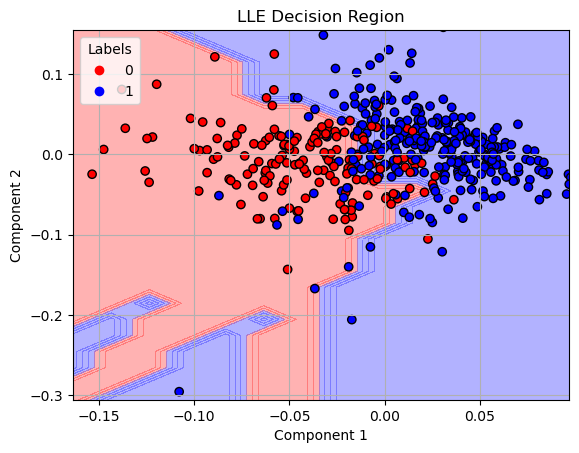

In [7]:
#### Your code here

#train the knn model; test for the best score for various k values; default as 0
best_score = 0
best_k = 0

#iterate through the for loop and check the cross val scores; print mean score for all models
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_lle, y_train, cv=5)
    #use the mean cross validation scores as comparison
    score = np.mean(scores)
    print(f"k value: {k}, Cross-validation mean accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_k = k
        best_model = knn

# Train the best model on the LLE train data
best_model.fit(X_train_lle, y_train)
test_score = best_model.score(X_test_lle, y_test)
print(f"Best k: {best_k}, Test accuracy: {test_score:.4f}")

#classify the decision regions
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_lle, y_train) 

#execute function
decision_regions(X_train_lle, y_train, classifier=knn, title='LLE Decision Region')


#### 3(e) Train logistic regression model

No hyperparameter selection needed. 

Print the test accuracy, and draw the decision region.

Test accuracy: 0.6579


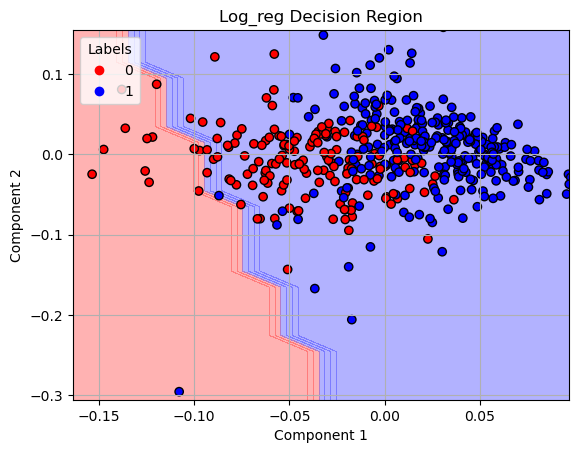

In [8]:
#### Your code here
#Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_lle, y_train)

#Evaluate the model test
test_accuracy = log_reg.score(X_test_lle, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

#Plot decision region
decision_regions(X_train_lle, y_train, classifier=log_reg, title='Log_reg Decision Region')


#### 3(f) Train decision tree

You should try different `max_depth` and select the best one.

Print the test accuracy for all models, and draw the decision region with the best `max_depth`.

Depth: 1, Test accuracy: 0.8421
Depth: 2, Test accuracy: 0.8421
Depth: 3, Test accuracy: 0.8684
Depth: 4, Test accuracy: 0.8596
Depth: 5, Test accuracy: 0.8509
Depth: 6, Test accuracy: 0.8333
Depth: 7, Test accuracy: 0.8070
Depth: 8, Test accuracy: 0.8070
Depth: 9, Test accuracy: 0.8246
Depth: 10, Test accuracy: 0.8070
Depth: 11, Test accuracy: 0.8070
Depth: 12, Test accuracy: 0.8246
Depth: 13, Test accuracy: 0.7895
Depth: 14, Test accuracy: 0.7807
Depth: 15, Test accuracy: 0.8070
Best max_depth for Decision Tree: 3, Test accuracy: 0.8684


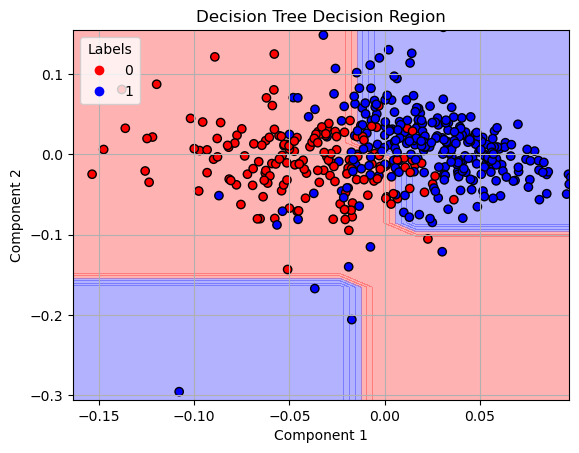

In [9]:
#### Your code here
from sklearn.tree import DecisionTreeClassifier

#default best score decision tree as 0
best_score_dt = 0
best_depth_dt = None

#iterate through different depths and chosse the best score
for depth in range(1, 16):
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_lle, y_train)
    score = dt.score(X_test_lle, y_test)
    print(f"Depth: {depth}, Test accuracy: {score:.4f}")
    if score > best_score_dt:
        best_score_dt = score
        best_depth_dt = depth
        best_dt = dt

#print score result
print(f"Best max_depth for Decision Tree: {best_depth_dt}, Test accuracy: {best_score_dt:.4f}")

#plot decision region
decision_regions(X_lle, y_train, classifier=best_dt, title='Decision Tree Decision Region')

#### 3(g) Train random forest

You should try different `max_depth` and `n_estimators`, then select the best hyperparameters.

Print the test accuracy for all models, and draw the decision region of the model with selected `max_depth` and `n_estimators`.

Depth: 1, Estimators: 10, Test accuracy: 0.8333
Depth: 1, Estimators: 20, Test accuracy: 0.8421
Depth: 1, Estimators: 30, Test accuracy: 0.8421
Depth: 1, Estimators: 40, Test accuracy: 0.8421
Depth: 1, Estimators: 50, Test accuracy: 0.8421
Depth: 1, Estimators: 60, Test accuracy: 0.8421
Depth: 1, Estimators: 70, Test accuracy: 0.8333
Depth: 1, Estimators: 80, Test accuracy: 0.8333
Depth: 1, Estimators: 90, Test accuracy: 0.8333
Depth: 2, Estimators: 10, Test accuracy: 0.8684
Depth: 2, Estimators: 20, Test accuracy: 0.8509
Depth: 2, Estimators: 30, Test accuracy: 0.8421
Depth: 2, Estimators: 40, Test accuracy: 0.8421
Depth: 2, Estimators: 50, Test accuracy: 0.8596
Depth: 2, Estimators: 60, Test accuracy: 0.8333
Depth: 2, Estimators: 70, Test accuracy: 0.8333
Depth: 2, Estimators: 80, Test accuracy: 0.8596
Depth: 2, Estimators: 90, Test accuracy: 0.8421
Depth: 3, Estimators: 10, Test accuracy: 0.8421
Depth: 3, Estimators: 20, Test accuracy: 0.8421
Depth: 3, Estimators: 30, Test accuracy:

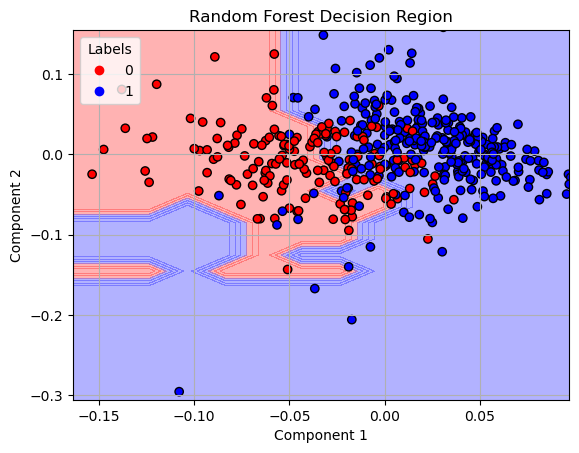

In [10]:
#### Your code here

#default best score random forest as 0
best_score_rf = 0
best_params_rf = {}

#iterate through two for loops with different depths and n_estimator values to select best accuracy score
for depth in range(1, 11):
    for n_estimators in range(10, 91, 10):
        rf = RandomForestClassifier(max_depth=depth, n_estimators=n_estimators)
        rf.fit(X_lle, y_train)
        score = rf.score(X_test_lle, y_test)
        print(f"Depth: {depth}, Estimators: {n_estimators}, Test accuracy: {score:.4f}")
        if score > best_score_rf:
            best_score_rf = score
            best_params_rf = {'max_depth': depth, 'n_estimators': n_estimators}
            best_rf = rf

#print the best score tested
print(f"Best params for Random Forest: {best_params_rf}, Test accuracy: {best_score_rf:.4f}")

#execute decision region function
decision_regions(X_lle, y_train, classifier=best_rf, title='Random Forest Decision Region')


#### 3(h) Train max voting classifier

You should use the hyperparameters you select before. 

Print the test accuracy, and draw the decision region.

Test accuracy of the Voting Classifier: 0.9122807017543859


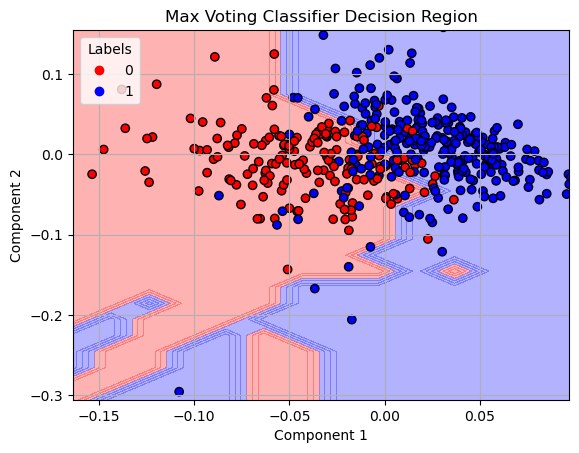

In [11]:
#### Your code here

#Set up the voting classifier; use best scores from before
voting_clf = VotingClassifier(estimators=[
    ('knn', KNeighborsClassifier(n_neighbors=best_k)),
    ('log_reg', LogisticRegression()),
    ('dt', best_dt),
    ('rf', best_rf)
], voting='hard')

#Train voting classifier on LLE
voting_clf.fit(X_train_lle, y_train)

#Score the model on LLE test data
test_score = voting_clf.score(X_test_lle, y_test)
print(f"Test accuracy of the Voting Classifier: {test_score}")

#Implement decision regions
decision_regions(X_train_lle, y_train, classifier=voting_clf, title='Max Voting Classifier Decision Region')